# Data for autoprice   ( Normalization & mean )

In [15]:
# Class of k-Nearest Neigbor Classifier


class kNN():
    maxTrain = []
    
    def __init__(self, k = 3, exp = 2):
    # constructor for kNN classifier 
    # k is the number of neighbor for local class estimation
    # exp is the exponent for the Minkowski distance
        self.k = k
        self.exp = exp
      
    def fit(self, X_train, Y_train):
    # training k-NN method
    # X_train is the training data given with input attributes. n-th row correponds to n-th instance.
    # Y_train is the output data (output vector): n-th element of Y_train is the output value for n-th instance in X_train.
        self.X_train = X_train
        self.Y_train = Y_train   
         
    def getDiscreteClassification(self, X_test):
    # predict-class k-NN method
    # X_test is the test data given with input attributes. Rows correpond to instances
    # Method outputs prediction vector Y_pred_test:  n-th element of Y_pred_test is the prediction for n-th instance in X_test
    
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []

   
    
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            # Store distances in a dataframe. The dataframe has the index of Y_train in order to keep the correspondence with the classes of the training instances 
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
        
            # Sort distances, and only consider the k closest points in the new dataframe df_knn
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            
            # Note that the index df_knn.index of df_knn contains indices in Y_train of the k-closed training instances to 
            # the i-th test instance. Thus, the dataframe self.Y_train[df_knn.index] contains the classes of those k-closed 
            # training instances. Method value_counts() computes the counts (number of occurencies) for each class in 
            # self.Y_train[df_knn.index] in dataframe predictions. 
            predictions = self.Y_train[df_knn.index].value_counts()
                 
            # the first element of the index predictions.index contains the class with the highest count; i.e. the prediction y_pred_test.
            y_pred_test = predictions.index[0]

            # add the prediction y_pred_test to the prediction vector Y_pred_test for all the test instances in X_test
            Y_pred_test.append(y_pred_test)
        
        return Y_pred_test

    
    def Minkowski_distance(self, x1, x2):
    # computes the Minkowski distance of x1 and x2 for two labeled instances (x1,y1) and (x2,y2)
    
        # Set initial distance to 0
        distance = 0
    
        # Calculate Minkowski distance using the exponent exp
        for i in range(len(x1)):
            distance = distance + abs(x1[i] - x2[i])**self.exp
        
        distance = distance**(1/self.exp)
    
        return distance
    
    
    def normilize_maximum_absolute_scaling(self,df):   
        # copy the dataframe
        df_scaled = df.copy()
        # apply maximum absolute scaling 
        for column in df_scaled.columns:  
            df_scaled[column] = df_scaled[column]  / df_scaled[column].abs().max()
           
        return df_scaled
    

        
    def getPrediction (self, X_test):
        
            # getting value type for Y
        Y_type_list =  Y_train.tolist()
        Y_type_no_dublicate = list(dict.fromkeys(Y_type_list))
        
        #creating new datafaram for Mean
        df_mean = pd.DataFrame(index=Y_type_no_dublicate)
        
        Y_pred_test = [] #prediction vector Y_pred_test for all the test instances in X_test is initialized to empty list []
        for i in range(len(X_test)):   #iterate over all instances in X_test
            test_instance = X_test.iloc[i] #i-th test instance 
            
            distances = []  #list of distances of the i-th test_instance for all the train_instance s in X_train, initially empty.
          
            for j in range(len(self.X_train)):  #iterate over all instances in X_train
                train_instance = self.X_train.iloc[j] #j-th training instance 
                distance = self.Minkowski_distance(test_instance, train_instance) #distance between i-th test instance and j-th training instance  
                distances.append(distance) #add the distance to the list of distances of the i-th test_instance
        
            df_dists = pd.DataFrame(data=distances, columns=['dist'], index = self.Y_train.index)
#             print(df_dists)
            df_nn = df_dists.sort_values(by=['dist'], axis=0)
            df_knn =  df_nn[:self.k]
            # clacultaing mean for each test data 
            mean = self.Y_train[df_knn.index].mean()
            
        
            df_mean['test'+str(i)] = mean
                
        
        print(df_mean)
                
        
        


Orgiginal Data

        test0   test1    test2   test3    test4    test5   test6   test7  \
13200  6095.0  7957.0  28248.0  7295.0  11694.0  18620.0  8449.0  6295.0   
35056  6095.0  7957.0  28248.0  7295.0  11694.0  18620.0  8449.0  6295.0   
7463   6095.0  7957.0  28248.0  7295.0  11694.0  18620.0  8449.0  6295.0   
7295   6095.0  7957.0  28248.0  7295.0  11694.0  18620.0  8449.0  6295.0   
9959   6095.0  7957.0  28248.0  7295.0  11694.0  18620.0  8449.0  6295.0   
...       ...     ...      ...     ...      ...      ...     ...     ...   
8238   6095.0  7957.0  28248.0  7295.0  11694.0  18620.0  8449.0  6295.0   
7299   6095.0  7957.0  28248.0  7295.0  11694.0  18620.0  8449.0  6295.0   
6692   6095.0  7957.0  28248.0  7295.0  11694.0  18620.0  8449.0  6295.0   
9538   6095.0  7957.0  28248.0  7295.0  11694.0  18620.0  8449.0  6295.0   
6295   6095.0  7957.0  28248.0  7295.0  11694.0  18620.0  8449.0  6295.0   

        test8   test9  ...  test45   test46   test47  test48   test49  test50  \
13200 

             test0        test1         test2        test3         test4  \
13200  6410.857143  7587.142857  22272.857143  9444.714286  10029.571429   
35056  6410.857143  7587.142857  22272.857143  9444.714286  10029.571429   
7463   6410.857143  7587.142857  22272.857143  9444.714286  10029.571429   
7295   6410.857143  7587.142857  22272.857143  9444.714286  10029.571429   
9959   6410.857143  7587.142857  22272.857143  9444.714286  10029.571429   
...            ...          ...           ...          ...           ...   
8238   6410.857143  7587.142857  22272.857143  9444.714286  10029.571429   
7299   6410.857143  7587.142857  22272.857143  9444.714286  10029.571429   
6692   6410.857143  7587.142857  22272.857143  9444.714286  10029.571429   
9538   6410.857143  7587.142857  22272.857143  9444.714286  10029.571429   
6295   6410.857143  7587.142857  22272.857143  9444.714286  10029.571429   

         test5        test6        test7        test8        test9  ...  \
13200  16400

             test0        test1         test2        test3         test4  \
13200  6721.153846  8077.230769  19754.153846  9437.461538  10494.615385   
35056  6721.153846  8077.230769  19754.153846  9437.461538  10494.615385   
7463   6721.153846  8077.230769  19754.153846  9437.461538  10494.615385   
7295   6721.153846  8077.230769  19754.153846  9437.461538  10494.615385   
9959   6721.153846  8077.230769  19754.153846  9437.461538  10494.615385   
...            ...          ...           ...          ...           ...   
8238   6721.153846  8077.230769  19754.153846  9437.461538  10494.615385   
7299   6721.153846  8077.230769  19754.153846  9437.461538  10494.615385   
6692   6721.153846  8077.230769  19754.153846  9437.461538  10494.615385   
9538   6721.153846  8077.230769  19754.153846  9437.461538  10494.615385   
6295   6721.153846  8077.230769  19754.153846  9437.461538  10494.615385   

              test5        test6        test7         test8        test9  ...  \
13200 

             test0        test1    test2        test3         test4  \
13200  7178.315789  7826.157895  18951.0  8451.736842  10103.947368   
35056  7178.315789  7826.157895  18951.0  8451.736842  10103.947368   
7463   7178.315789  7826.157895  18951.0  8451.736842  10103.947368   
7295   7178.315789  7826.157895  18951.0  8451.736842  10103.947368   
9959   7178.315789  7826.157895  18951.0  8451.736842  10103.947368   
...            ...          ...      ...          ...           ...   
8238   7178.315789  7826.157895  18951.0  8451.736842  10103.947368   
7299   7178.315789  7826.157895  18951.0  8451.736842  10103.947368   
6692   7178.315789  7826.157895  18951.0  8451.736842  10103.947368   
9538   7178.315789  7826.157895  18951.0  8451.736842  10103.947368   
6295   7178.315789  7826.157895  18951.0  8451.736842  10103.947368   

              test5        test6        test7         test8        test9  ...  \
13200  15728.315789  8998.157895  7155.578947  10658.526316  8998.

        test0    test1    test2    test3     test4     test5    test6  \
13200  7282.6  7883.16  18232.4  8749.44  10649.52  15588.76  9261.76   
35056  7282.6  7883.16  18232.4  8749.44  10649.52  15588.76  9261.76   
7463   7282.6  7883.16  18232.4  8749.44  10649.52  15588.76  9261.76   
7295   7282.6  7883.16  18232.4  8749.44  10649.52  15588.76  9261.76   
9959   7282.6  7883.16  18232.4  8749.44  10649.52  15588.76  9261.76   
...       ...      ...      ...      ...       ...       ...      ...   
8238   7282.6  7883.16  18232.4  8749.44  10649.52  15588.76  9261.76   
7299   7282.6  7883.16  18232.4  8749.44  10649.52  15588.76  9261.76   
6692   7282.6  7883.16  18232.4  8749.44  10649.52  15588.76  9261.76   
9538   7282.6  7883.16  18232.4  8749.44  10649.52  15588.76  9261.76   
6295   7282.6  7883.16  18232.4  8749.44  10649.52  15588.76  9261.76   

         test7     test8    test9  ...   test45    test46    test47  test48  \
13200  7411.24  10410.44  8864.52  ...  7883

             test0        test1         test2        test3         test4  \
13200  7194.225806  8747.322581  17513.225806  8710.225806  10413.354839   
35056  7194.225806  8747.322581  17513.225806  8710.225806  10413.354839   
7463   7194.225806  8747.322581  17513.225806  8710.225806  10413.354839   
7295   7194.225806  8747.322581  17513.225806  8710.225806  10413.354839   
9959   7194.225806  8747.322581  17513.225806  8710.225806  10413.354839   
...            ...          ...           ...          ...           ...   
8238   7194.225806  8747.322581  17513.225806  8710.225806  10413.354839   
7299   7194.225806  8747.322581  17513.225806  8710.225806  10413.354839   
6692   7194.225806  8747.322581  17513.225806  8710.225806  10413.354839   
9538   7194.225806  8747.322581  17513.225806  8710.225806  10413.354839   
6295   7194.225806  8747.322581  17513.225806  8710.225806  10413.354839   

             test5        test6        test7         test8        test9  ...  \
13200  

Text(0, 0.5, 'Mean Abolute Error')

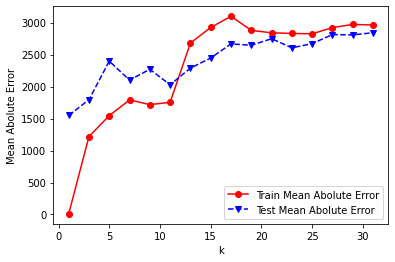

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split 

from numpy.random import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error

##################################################
# Hold-out testing: Training and Test set creation
##################################################

data = pd.read_csv('autoprice.csv')
data.head()
Y = data['class']
X = data.drop(['class'],axis=1)
data.head()


X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.34, random_state=10)

# range for the values of parameter k for kNN

k_range = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31]

trainMain = np.zeros(len(k_range))
testMain = np.zeros(len(k_range))


index = 0 
for k  in  k_range:
    clf = kNN(k)
    clf.fit(X_train, Y_train)
    Y_predTrain = clf.getDiscreteClassification(X_train)
    Y_predTest = clf.getDiscreteClassification(X_test)
    trainMain[index] = mean_absolute_error(Y_train, Y_predTrain)
    testMain[index] = mean_absolute_error(Y_test, Y_predTest)
    teast = clf.getPrediction(X_test)
    
    index += 1
    
   
#########################################
# Plot of training and test accuracies
#########################################

plt.plot(k_range,trainMain,'ro-',k_range,testMain,'bv--')
plt.legend(['Train Mean Abolute Error','Test Mean Abolute Error'])
plt.xlabel('k')
plt.ylabel('Mean Abolute Error')

the above grash shoen the absolute error value of Y test and Y train data. 
and for the tables you can see the mean of each value for each Y for all of the test cases